# Mount to Google Drive

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# %cd /content/drive/My Drive/Colab Notebooks/ONR_CU_EXP1/EEG_Analysis_SK
# !ls

# Imports & Installs

In [3]:
import os
import warnings
import numpy as np
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [4]:
# !pip install mne
import mne
from mne.preprocessing import ICA

In [5]:
# !pip install autoreject
from autoreject import AutoReject

In [6]:
# !pip install pyxdf
import pyxdf

In [7]:
# !pip uninstall -y numpy autoreject mne scipy
# !pip install numpy==1.23.5 scipy mne autoreject

# Compress Warnings

In [8]:
# Ignore runtime warnings for clean output (Came with the SK code)
warnings.filterwarnings('ignore', category=RuntimeWarning)
# "Effective window size : 1.024 (s)" woudl print 5000x (J added)
mne.set_log_level('WARNING')

# Manipulated Variables

In [9]:
participant = "P01"
# LL 42 12
# LH 43 13
# HL 44 14
# HH 46 16
cond = "LH"
cond_start = 43
cond_end = 13
set_file = "Dataset/P01/sub-P001_ses-S001_task-Default_run-001_eeg.xdf"
marker_csv = "Dataset/P01/P01events_data.csv"

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Wed Jan 15 12:32:34 2025', '__version__': '1.0', '__globals__': [], 'Channel': array([[(array(['Fz  ', 'Cz  ', 'Pz  ', 'Acc1', 'Acc2', 'Acc3'], dtype='<U4'), array([[0.1, 0. , 0. ],
               [0.2, 0.1, 0. ],
               [0.3, 0.2, 0. ],
               [0. , 0.1, 0.2],
               [0. , 0.2, 0.3],
               [0. , 0.3, 0.4]]))                                                                     ]],
      dtype=[('Name', 'O'), ('Loc', 'O')])}
['Fz', 'Cz', 'Pz', 'Acc1', 'Acc2', 'Acc3']
{'names': ['Fz', 'Cz', 'Pz', 'Acc1', 'Acc2', 'Acc3'], 'locs': array([[0.1, 0.2, 0.3],
       [0. , 0.1, 0.2],
       [0. , 0. , 0. ]])}
Starting processing pipeline...

Step 0: Loading .xdf file...
sfreq: 250.0
Channel names: ['Fp1', 'Fz', 'F3', 'F7', 'F9', 'FC5', 'FC1', 'C3', 'ACC_X', 'ACC_Y', 'ACC_Z']
LOOK HERE FOR THE CHANNEL NAMES: ['Fz', 'Cz', 'Pz', 'Acc1', 'Acc2', 'Acc3']
Dropping channels: ['F7', 'F9', 'FC5', 'FC1', 'C3'

c:\Users\Jalynn\anaconda3\envs\Universal_EEG_Analyzer\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm






Estimated consensus=1.00 and n_interpolate=2
Success with consensus=1.0!
Channels after AutoReject: ['Fz', 'Cz', 'Pz', 'Acc1', 'Acc2', 'Acc3']

Step 2: Epoching data...
Raw n times: 65000
Raw info sfreq: 250.0
Raw data range: Start=0, Stop=260.0, Duration=1.0, Overlap=0.0
Generated 260 fixed-length events.
Epoch trial data saved to 'GammaResults/P01/LH_epoch_trl_train.csv'.

Step 5: Computing band power for train...
Band power results saved to 'GammaResults/P01/LH_band_power_train.csv'.

Step 7: Computing PSD and ratios for analysis...
PSD results saved to 'GammaResults/P01/LH_psd_results_train.csv'.
Ratios analysis saved to 'GammaResults/P01/LH_ratios_analysis_train.csv'.


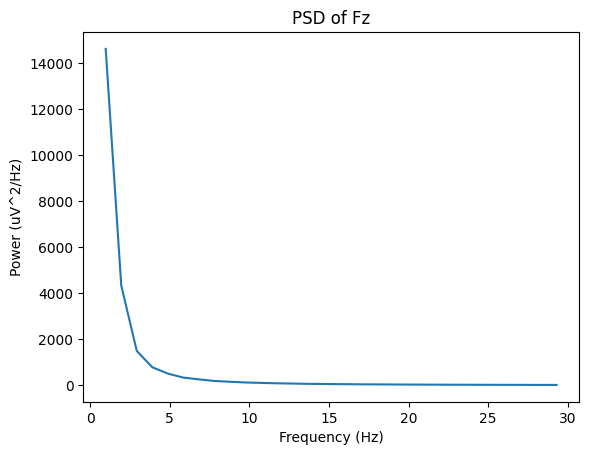


Finalizing gamma table for train...
Finalized gamma table saved to 'GammaResults/P01/LH_log_z_gamma_power_train.csv'.
Averaged gamma power (log_z) saved to 'GammaResults/P01/LH_avg_log_z_gamma_power_train.csv'.

Computing FFT for train...
FFT results saved to 'GammaResults/P01/LH_fft_train.csv'.

Computing band averages for train...
No channels found for region Occipital. Skipping.
No channels found for region Occipital. Skipping.
No channels found for region Occipital. Skipping.
No channels found for region Occipital. Skipping.
No channels found for region Occipital. Skipping.
Band averages saved to 'GammaResults/P01/LH_band_averages_train.csv'.

Step 3: Applying baseline correction...
Detecting rest intervals from markers...
Using detected rest interval for baseline correction: Start=60, End=61
Baseline correction using rest interval applied successfully.
Saving baseline-corrected file to 'GammaResults/P01/fif/LH_D_bc.fif'...

Step 4: Applying ICA...
[0 1 2]
Found EOG components: []

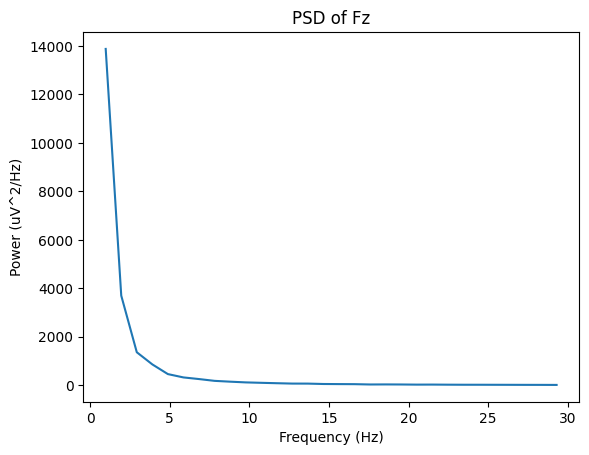


Finalizing gamma table for test...
Finalized gamma table saved to 'GammaResults/P01/LH_log_z_gamma_power_test.csv'.
Averaged gamma power (log_z) saved to 'GammaResults/P01/LH_avg_log_z_gamma_power_test.csv'.

Computing FFT for test...
FFT results saved to 'GammaResults/P01/LH_fft_test.csv'.

Computing band averages for test...
No channels found for region Occipital. Skipping.
No channels found for region Occipital. Skipping.
No channels found for region Occipital. Skipping.
No channels found for region Occipital. Skipping.
No channels found for region Occipital. Skipping.
Band averages saved to 'GammaResults/P01/LH_band_averages_test.csv'.

Computing dynamic training and test ratios...
Error: 'psd_results.csv' file not found.

Consolidating participant-level data...
Missing files required for participant data consolidation: ['GammaResults/P01/ratios_analysis.csv', 'GammaResults/P01/Condition1_band_averages.csv', 'GammaResults/P01/Condition2_band_averages.csv', 'GammaResults/P01/band_p

In [10]:
import os
import warnings
import numpy as np
import pandas as pd
from scipy.io import loadmat
import mne
from autoreject import AutoReject
from mne.preprocessing import ICA
import matplotlib.pyplot as plt
import pyxdf
from scipy.stats import ttest_ind

# Ignore runtime warnings for clean output
warnings.filterwarnings('ignore', category=RuntimeWarning)
mne.set_log_level('WARNING')

class EEGProcessor:
    def __init__(self, set_file, marker_csv, channel_mat, fixed_channels, prestim, poststim, baseline_window):
        self.set_file = set_file
        self.marker_df = pd.read_csv(marker_csv)
        self.channel_info = self._load_channel_info(channel_mat)
        print(self.channel_info)
        self.fixed_channels = fixed_channels
        self.prestim = prestim / 1000 # Why divide by 1000?
        self.poststim = poststim / 1000
        self.baseline_window = baseline_window
        self.sfreq = None
        self.condition_timestamps = {}
        self.trials = []
        self.trl = []
        self.participant_ratios = []

        # To store epoch objects for later use (e.g. for gamma computation)
        self.epochs_train = None
        self.epochs_test = None

        # Define regions and their corresponding channels
        self.regions = {
            'Frontal': ['Fp1', 'Fz', 'F3', 'F7', 'F9', 'FC3', 'FC5', 'ACC_X', 'ACC_Y', 'ACC_Z'],
            'Central': ['C3', 'Cz'],
            'Parietal': ['P3', 'P4', 'Pz'],
            'Occipital': ['O1', 'O2'],
        }

    def _load_channel_info(self, channel_mat):
        mat_data = loadmat(channel_mat) # Loads the .mat file with the 6 channels
        print(mat_data)
        # channel_names = [str(mat_data['Channel']['Name'][0][i][0]) for i in range(mat_data['Channel']['Name'].shape[1])] # Extracts the channel names from a matlab file and saves in a []
        channel_names = ["Fz", "Cz", "Pz", "Acc1", "Acc2", "Acc3"]
        print(channel_names)
        channel_locs = np.array([mat_data['Channel']['Loc'][0][i][:3] for i in range(mat_data['Channel']['Loc'].shape[1])]).squeeze().T # Extract channel locations and compresses into x,y,z for further analysis
        return {'names': channel_names, 'locs': channel_locs} # Creates a dictionary for the channel names with their associated locations

    def load_set(self):
        print("\nStep 0: Loading .xdf file...")


        # Load the .xdf file
        streams, _ = pyxdf.load_xdf(self.set_file)

        # Find the EEG stream
        eeg_stream = next((s for s in streams if s['info']['type'][0].lower() == 'eeg'), None)
        if eeg_stream is None:
            raise ValueError("No EEG stream found in the XDF file.")

        # Extract data and sampling frequency
        data = np.array(eeg_stream['time_series']).T
        try:
            sfreq = float(eeg_stream['info']['sample_rate'][0])
        except:
            sfreq = 250.0 # Jalynn changed from 255 to 250
        print(f'sfreq: {sfreq}')

        # Extract channel names
        try:
            ch_names = [chan['label'][0] for chan in eeg_stream['info']['desc'][0]['channels'][0]['channel']]
        except:
            ch_names = [f"Ch{i+1}" for i in range(data.shape[0])]
        print(f'Channel names: {ch_names}') # 11 original

        # Create MNE Info and Raw objects
        info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=['eeg'] * len(ch_names))
        raw = mne.io.RawArray(data, info)

        # Handle channel names from .mat file
        ch_names_from_mat = self.channel_info['names']
        print(f"LOOK HERE FOR THE CHANNEL NAMES: {ch_names_from_mat}") # 6 updated
        if len(raw.ch_names) != len(ch_names_from_mat):
            # if len(raw.ch_names) < len(ch_names_from_mat):
            #     ch_names_from_mat = ch_names_from_mat[:len(raw.ch_names)]
            # elif len(raw.ch_names) > len(ch_names_from_mat):
            #     raw.drop_channels(raw.ch_names[len(ch_names_from_mat):])

            # Jay changed here because ch_names will always have the original 11
            # ch_names_from_mat will always have the desired 6 channels
            # NOTE they haven't been renamed yet
            # Find channels in raw that are not in the .mat file
            channels_to_drop = ['F7', 'F9', 'FC5', 'FC1', 'C3']
            # Drop channels not in the .mat file
            if channels_to_drop:
                print(f"Dropping channels: {channels_to_drop}")
                raw.drop_channels(channels_to_drop)

        # Rename channels and set montage
        raw.rename_channels({raw.ch_names[i]: ch_names_from_mat[i] for i in range(len(raw.ch_names))})
        montage = mne.channels.make_dig_montage(ch_pos=dict(zip(ch_names_from_mat, self.channel_info['locs'].T)))

        # Jay: Now that all the channels are actually added in, we need to set acc and eeg differently
        channel_types = {ch: 'eeg' for ch in ['Fz', 'Cz', 'Pz']}
        channel_types.update({ch: 'misc' for ch in ['Acc1', 'Acc2', 'Acc3']})
        raw.set_channel_types(channel_types)

        raw.set_montage(montage)

        # Jay: Noooooo we don't want to add the originals back in
        # Add missing fixed channels if necessary
        # missing_channels = [chan for chan in self.fixed_channels if chan not in raw.ch_names]
        # for chan in missing_channels:
        #     raw.add_channels([mne.io.RawArray(np.zeros((1, len(raw.times))), mne.create_info([chan], raw.info['sfreq'], ch_types='eeg'))])

        # Downsample to 250 Hz
        print("\nStep 0.1: Downsampling to 250 Hz...")
        raw.resample(250)

        # Apply bandpass filter (0.1 Hz to 30 Hz)
        print("\nStep 0.2: Applying bandpass filter (0.1 Hz to 30 Hz)...")
        raw.filter(l_freq=0.1, h_freq=30, picks='eeg')

        # Jay decided to remove
        # Save processed files
        # print("\nSaving processed files...")
        # raw.save("Results/D_original.fif", overwrite=True)  # Original raw file
        # raw.save("Results/D_montaged.fif", overwrite=True)  # Montaged raw file
        # raw.save("Results/D_cropped.fif", overwrite=True)  # Cropped raw file

        print("EEG data successfully loaded and preprocessed.")
        return raw

        # Was printed twice for some reason
        # return raw

    # Jay: Add fake data
    # def _add_pseudo_stim_channel(self, raw):
    #     print("\nStep 1: Adding pseudo stim channel...")

    #     # Jay: I changed event instance of event_code to value - Will probably scratch this section though
    #     # if 'time' not in self.marker_df.columns or 'event_code' not in self.marker_df.columns:
    #     #     raise KeyError("The CSV file must contain 'time' and 'event_code' columns.")

    #     # self.marker_df['event_code'] = pd.to_numeric(self.marker_df['event_code'], errors='coerce').dropna().astype(int)
    #     # self.marker_df['time'] = pd.to_numeric(self.marker_df['time'], errors='coerce').dropna()
    #     # self.marker_df = self.marker_df.dropna(subset=['time', 'event_code'])

    #     # print("Unique event codes in the CSV:", self.marker_df['event_code'].unique())

    #     if 'time' not in self.marker_df.columns or 'value' not in self.marker_df.columns:
    #         raise KeyError("The CSV file must contain 'time' and 'value' columns.")

    #     self.marker_df['value'] = pd.to_numeric(self.marker_df['value'], errors='coerce').dropna().astype(int)
    #     self.marker_df['time'] = pd.to_numeric(self.marker_df['time'], errors='coerce').dropna()
    #     self.marker_df = self.marker_df.dropna(subset=['time', 'value'])

    #     print("Unique event codes in the CSV:", self.marker_df['value'].unique())

    #     stim_data = np.zeros((1, raw.n_times))
    #     sfreq = raw.info['sfreq']
    #     for _, row in self.marker_df.iterrows():
    #         sample_idx = int(row['time'] * sfreq)
    #         if 0 <= sample_idx < raw.n_times:
    #             # stim_data[0, sample_idx] = row['event_code']
    #             stim_data[0, sample_idx] = row['value']

    #     stim_info = mne.create_info(['STI 014'], raw.info['sfreq'], ch_types=['stim'])
    #     stim_raw = mne.io.RawArray(stim_data, stim_info)
    #     print(f'stim raw: {stim_raw}')
    #     raw.add_channels([stim_raw], force_update_info=True)

    #     return raw

    def extract_event_windows(self, raw):
        print("\nStep 2: Extracting event windows for 'training' and 'test' periods...")
        # raw = self._add_pseudo_stim_channel(raw)

        # Jay added pulled from add pseudo method
        if 'time' not in self.marker_df.columns or 'value' not in self.marker_df.columns:
            raise KeyError("The CSV file must contain 'time' and 'value' columns.")
        self.marker_df['value'] = pd.to_numeric(self.marker_df['value'], errors='coerce').dropna().astype(int)
        self.marker_df['time'] = pd.to_numeric(self.marker_df['time'], errors='coerce').dropna()
        self.marker_df = self.marker_df.dropna(subset=['time', 'value']).reset_index(drop=True) # Jay: Have to reset the index for removed rows

        # Jay: Hmm ok not sure what this is - didn't realize you could pull from the stim channel
        # Jay: unfortuantely, the lsl values had to be modified so we shouldn't pull from the original anyway
        # Find events from the stim channel
        # events = mne.find_events(raw, stim_channel='STI 014', shortest_event=1)
        # print(f"Found {len(events)} events: {np.unique(events[:, 2])}")
        events = self.marker_df['value']
        print(self.marker_df['value'])
        times = self.marker_df['time']

        # Extract indices of specific event markers
        event_42_indices = [i for i, event in enumerate(events) if event == cond_start]
        print(events[event_42_indices[0]])
        event_12_indices = [i for i, event in enumerate(events) if event == cond_end]

        if len(event_42_indices) < 7 or len(event_12_indices) < 7:
            print("Insufficient markers for training or test period.")
            print(f'Length of 42/46 indices: {len(event_42_indices)}')
            print(f'Length of 12/16 indices: {len(event_12_indices)}')
            return None, None

        # Jay: Not entirely sure why events wasn't just an [] but [][]
        # Define start and end markers for training and test periods
        # training_start = events[event_42_indices[0]][0]  # First "42"
        # training_end = events[event_12_indices[4]][0]  # 6th "12" # Jay: For some reason this was the last one... changed from 5 to 4
        # test_start = events[event_42_indices[-1]][0]  # Last "42"
        # test_end = events[event_12_indices[-1]][0]  # Last "12"
        training_start = times[event_42_indices[0]]  # First "42"
        print(f'Actual training start: {training_start}')
        training_end = times[event_12_indices[5]]  # 6th "12" # Jay: For some reason this was the last one... changed from 5 to 4 !!
        print(f'Actual training end: {training_end}')
        test_start = times[event_42_indices[-1]]  # Last "42"
        test_end = times[event_12_indices[-1]]  # Last "12"

        # sfreq = raw.info['sfreq']
        # print(f'Actual: {sfreq}')

        # Crop raw data for training and test periods
        # Jay: some clarification on what is happening here
        # Jay: Crop works with seconds. So taking the start sample / frequency provides seconds
        # Jay: Crops then copies the data from that start and end section
        # Jay: AHH we don't want this. Time is already in seconds
        # raw_training = raw.copy().crop(tmin=training_start / sfreq, tmax=training_end / sfreq) if training_start < training_end else None
        # raw_test = raw.copy().crop(tmin=test_start / sfreq, tmax=test_end / sfreq) if test_start < test_end else None
        raw_training = raw.copy().crop(tmin=training_start, tmax=training_end) if training_start < training_end else None
        raw_test = raw.copy().crop(tmin=test_start, tmax=test_end) if test_start < test_end else None

        # Save cropped data
        if raw_training:
            training_file = f"GammaResults/{participant}/fif/{cond}_training_data.fif"
            raw_training.save(training_file, overwrite=True)
            print(f"Training data saved to '{training_file}'")
        else:
            print("Invalid training period duration.")

        if raw_test:
            test_file = f"GammaResults/{participant}/fif/{cond}_test_data.fif"
            raw_test.save(test_file, overwrite=True)
            print(f"Test data saved to '{test_file}'")
        else:
            print("Invalid test period duration.")

        # Log durations
        if raw_training:
            # Jay: same thing here - no sfreq
            # print(f"Training data duration: {(training_end - training_start) / sfreq} seconds")
            print(f"Training data duration: {(training_end - training_start)} seconds")

        if raw_test:
            # Jay: same thing here - no sfreq
            # print(f"Test data duration: {(test_end - test_start) / sfreq} seconds")
            print(f"Test data duration: {(test_end - test_start)} seconds")

        # Save condition timestamps
        condition_timestamps = {
            # Jay: same thing here - no sfreq
            # 'training_start': training_start / sfreq,
            # 'training_end': training_end / sfreq,
            # 'test_start': test_start / sfreq,
            # 'test_end': test_end / sfreq,
            'training_start': training_start,
            'training_end': training_end,
            'test_start': test_start,
            'test_end': test_end,
        }
        self.condition_timestamps = condition_timestamps
        pd.DataFrame([condition_timestamps]).to_csv(f"GammaResults/{participant}/{cond}_condition_timestamps.csv", index=False)
        print(f"Condition timestamps saved to 'GammaResults/{participant}/{cond}_condition_timestamps.csv'.")

        # JAY TO DO UNCOMMENT SOON
        # J: Ughhhhh: | event type 42/12 | index of event type | condition 1/2 train/test |
        # Save trial data
        # trials = [
        #     {'event_type': event, 'sample_idx': event[0], 'condition': 'Condition1' if event[2] == 42 else 'Condition2'}
        #     for event in events if event[2] in [42, 12]
        # ]
        # self.trials = trials
        # pd.DataFrame(trials).to_csv("Results/trials.csv", index=False)
        # print("Trials saved to 'Results/trials.csv'.")
        # Prepare a list to hold the trial data

        # start jays additions

        trials = []

        # Loop through each pair of 42 and 12
        for i, start_index in enumerate(event_42_indices):
            if i < len(event_12_indices):  # Ensure there's a corresponding "12" index
                end_index = event_12_indices[i]

                # Determine condition based on whether it's the last 42/12 pair
                condition = 'train' if i < len(event_42_indices) - 1 else 'test'

                # Add data for both the start (42) and end (12) events
                trials.append({'event_type': events[start_index], 'sample_idx': start_index, 'time': times[start_index], 'condition': condition})
                trials.append({'event_type': events[end_index], 'sample_idx': end_index, 'time': times[end_index], 'condition': condition})

        # Handle last 42/12 pair for test condition (if required)
        if len(event_42_indices) > len(event_12_indices):
            last_start_index = event_42_indices[-1]
            trials.append({'event_type': events[last_start_index], 'sample_idx': last_start_index, 'time': times[last_start_index], 'condition': 'test'})

        # Create a DataFrame and save to CSV
        trials_df = pd.DataFrame(trials)
        trials_df.to_csv(f"GammaResults/{participant}/{cond}_trials.csv", index=False)

        print(f"Trials saved to 'GammaResults/{participant}/{cond}_trials.csv'.")

        # End jays additions

        return raw_training, raw_test


    def _load_events_from_csv(self):
        print("\nLoading events from CSV...")

        # if 'time' not in self.marker_df.columns or 'event_code' not in self.marker_df.columns:
        #     raise KeyError("The CSV file must contain 'time' and 'event_code' columns.")

        # self.marker_df['event_code'] = self.marker_df['event_code'].astype(int)

        # sfreq = self.sfreq or 250
        # events = []
        # for _, row in self.marker_df.iterrows():
        #     events.append([int(row['time'] * sfreq), 0, row['event_code']])

        if 'time' not in self.marker_df.columns or 'value' not in self.marker_df.columns:
            raise KeyError("The CSV file must contain 'time' and 'value' columns.")

        self.marker_df['value'] = self.marker_df['value'].astype(int)

        sfreq = self.sfreq or 250
        events = []
        for _, row in self.marker_df.iterrows():
            events.append([int(row['time'] * sfreq), 0, row['value']])

        events = np.array(events)
        print(f"Loaded {len(events)} events with IDs: {np.unique(events[:, 2])}")
        return events

    def epoch_data(self, raw, type, duration=1.0, overlap=0.0):
        print("\nStep 2: Epoching data...")
        start = 0
        stop = raw.n_times / raw.info['sfreq']
        temp = raw.info['sfreq'] # J
        print(f'Raw n times: {raw.n_times}') # J
        print(f'Raw info sfreq: {temp}') # J
        print(f"Raw data range: Start={start}, Stop={stop}, Duration={duration}, Overlap={overlap}")

        try:
            if overlap >= duration:
                raise ValueError(f"Overlap must be >=0 but < duration ({duration}), got {overlap}")

            events = mne.make_fixed_length_events(
                raw, id=1, start=start, stop=stop, duration=duration, overlap=overlap
            )
            print(f"Generated {len(events)} fixed-length events.")
        except ValueError as e:
            print(f"Error generating events: {e}")
            return None

        if len(events) == 0:
            print("No fixed-length events created.")
            return None

        epochs = mne.Epochs(
            raw, events, tmin=0, tmax=duration, baseline=None, detrend=1, preload=True
        )

        # Save trial information
        trial_data = []
        for event in events:
            trial_info = {
                # 'start': event[0],
                # 'end': event[0] + int(raw.info['sfreq'] * duration),
                # 'type': event[2]
                # Jay: I wanted different info in my epoch csv files
                'start': event[0] / raw.info['sfreq'],  # Convert to seconds
                'end': (event[0] + int(raw.info['sfreq'] * duration)) / raw.info['sfreq'],
                'samples': int(raw.info['sfreq'] * duration),
                'type': event[2]
            }
            self.trl.append(trial_info)
            trial_data.append(trial_info)

        # Save trial data to a CSV file
        trial_df = pd.DataFrame(trial_data)
        # I also wanted the file name to differ on train or test so I separated them here
        filename = f"GammaResults/{participant}/{cond}_epoch_trl_{type}.csv"
        trial_df.to_csv(filename, index=False)
        print(f"Epoch trial data saved to '{filename}'.")

        return epochs


    def apply_baseline_correction(self, raw, rest_events=None):
        """
        Applies baseline correction using rest intervals if available or a default 15s baseline.
        """
        print("\nStep 3: Applying baseline correction...")
        sfreq = raw.info['sfreq']

        # Detect rest intervals from markers (202-212 and 203-213)
        # Jay: Brutal it is 200 to 210 for any and all rests
        print("Detecting rest intervals from markers...")
        # Jay: with channel removal - STI 014 isn't an option anymore - use marker_df
        # rest_events_detected = mne.find_events(raw, stim_channel='STI 014', shortest_event=1)
        # He automated the process here - why are we still using a hardcoded baseline window?
        # rest_start_event = [event[0] for event in rest_events_detected if event[2] in [202, 203]]
        # rest_end_event = [event[0] for event in rest_events_detected if event[2] in [212, 213]]
        rest_start_event = self.marker_df[self.marker_df['value'] == 200].index.tolist()
        rest_end_event = self.marker_df[self.marker_df['value'] == 210].index.tolist()

        # rest_start = rest_start_event[0] if rest_start_event else None
        # rest_end = rest_end_event[-1] if rest_end_event else None
        # Jay; Pass the index not the timestamp!
        rest_start = rest_start_event[0] if rest_start_event else None
        rest_end = rest_end_event[0] if rest_end_event else None

        # Verify the rest interval
        if rest_start is not None and rest_end is not None and rest_end > rest_start:
            print(f"Using detected rest interval for baseline correction: Start={rest_start}, End={rest_end}")
            try:
                raw.apply_function(
                    # lambda x: x - np.mean(x[:, rest_start:rest_end], axis=-1) # Jay: Incorrect dimensions! Baseline now correctly applied
                    lambda x: x - np.mean(x[:, rest_start:rest_end], axis=-1)[:, None],
                    picks='eeg', channel_wise=False
                )
                print("Baseline correction using rest interval applied successfully.")
            except Exception as e:
                print(f"Error applying baseline correction with rest interval: {e}") # Jay: Error applying baseline correction with rest interval: operands could not be broadcast together with shapes (3,72690) (3,)
                  # Sounds like it is due to a mismatch array dimensions
        else:
            if rest_start is None or rest_end is None:
                print("Warning: Rest interval markers not detected.")
            elif rest_end <= rest_start:
                print("Warning: Detected rest interval is invalid (end occurs before or at start).")

            # Fallback: Use default 15s baseline
            print("Falling back to default 15s baseline...")
            baseline_start = int(max(0, (raw.times[0] + 15) * sfreq))  # First 15 seconds of the recording
            baseline_end = int(max(0, raw.times[0] * sfreq))  # Start of the recording

            if baseline_end > baseline_start:
                print(f"Using default baseline: Start={baseline_start}, End={baseline_end}")
                try:
                    raw.apply_function(
                        lambda x: x - np.mean(x[:, baseline_start:baseline_end], axis=-1),
                        picks='eeg', channel_wise=False
                    )
                    print("Baseline correction using default interval applied successfully.")
                except Exception as e:
                    print(f"Error applying baseline correction with default interval: {e}")
            else:
                print("Error: Default baseline interval is invalid. Skipping baseline correction.")

        # Save the baseline-corrected file
        print(f"Saving baseline-corrected file to 'GammaResults/{participant}/fif/{cond}_D_bc.fif'...")
        raw.save(f"GammaResults/{participant}/fif/{cond}_D_bc.fif", overwrite=True)

        return raw


    # J: https://autoreject.github.io/stable/index.html
    # J: Needs more research
    def apply_autoreject(self, raw):
        """Apply AutoReject to repair noisy segments, ensuring no channels are dropped."""
        print("\nStep 4: Applying AutoReject (Repair Only)...")
        # Jay: We can change the duration here between 1 and 2 seconds
        epochs = mne.make_fixed_length_epochs(raw, duration=2.0, preload=True)

        # Will need to compare consensus values
        # Task: Add more consensus values
        consensus_values = [1.0, 0.1, 0.5]  # Try different consensus levels
        for consensus in consensus_values:
            try:
                print(f"Trying consensus={consensus}...")
                ar = AutoReject(
                    n_interpolate=[2, 5, len(raw.ch_names)],  # Max interpolation options
                    consensus=[consensus],  # Consensus threshold
                    thresh_method='bayesian_optimization',
                    random_state=42,
                    n_jobs=-1,
                    verbose=True
                )

                ar.fit(epochs)  # Fit AutoReject
                epochs_clean = ar.transform(epochs, return_log=False)  # Repair epochs

                # Reconstruct cleaned data into raw format
                raw_clean = epochs_clean.get_data().reshape(len(raw.ch_names), -1)
                raw_clean = mne.io.RawArray(raw_clean, raw.info)

                print(f"Success with consensus={consensus}!")
                print(f"Channels after AutoReject: {raw_clean.ch_names}")
                return raw_clean
            except Exception as e:
                print(f"Failed with consensus={consensus}: {e}")

        print("AutoReject failed. Returning original raw data.")
        return raw

    def apply_ica(self, raw):
        print("\nStep 4: Applying ICA...")

        # Dynamically set n_components to match available channels
        # Jay messing with the number of channels messed with this
        # n_components = min(len(self.fixed_channels), len(raw.info['ch_names']))
        # again, just going to hard code the value since we don't expect the number of eeg channels to change
        n_components = 3
        ica = ICA(n_components=n_components, random_state=97, max_iter=800)

        # Select EEG channels only for ICA
        picks = mne.pick_types(raw.info, eeg=True, exclude='bads')
        print(picks)
        ica.fit(raw, picks=picks)

        # Handle absence of EOG channels
        eog_indices, eog_scores = [], []
        eog_channels = [ch for ch in self.fixed_channels if ch in raw.ch_names]
        if eog_channels:
            eog_indices, eog_scores = ica.find_bads_eog(raw, ch_name=eog_channels)
            print(f"Found EOG components: {eog_indices}")
        else:
            print("No EOG channels found; skipping EOG artifact detection.")

        # Detect ECG artifacts if possible
        try:
            ecg_indices, ecg_scores = ica.find_bads_ecg(raw, method='correlation')
            print(f"Found ECG components: {ecg_indices}")
        except ValueError as e:
            print(f"ECG artifact detection skipped: {e}")
            ecg_indices = []

        # Mark bad components for exclusion
        ica.exclude = eog_indices + ecg_indices
        print(f"Excluded components: {ica.exclude}")

        # Apply ICA to the raw data
        raw = ica.apply(raw)
        print(f"ICA applied with {n_components} components. Excluded {len(ica.exclude)} components.")

        # Jay kind of odd how late in the code this one shows up
        # Ensure Results directory exists
        # if not os.path.exists("Results"):
        #     os.makedirs("Results")

        # Save the cleaned EEG file
        raw.save(f"GammaResults/{participant}/fif/{cond}_D_cleaned.fif", overwrite=True)
        print(f"Cleaned EEG file saved as 'GammaResults/{participant}/fif/{cond}_D_cleaned.fif'.")

        return raw, ica


    def compute_fft(self, epochs, condition_name):
        """
        Compute FFT for each epoch and channel, and save the results to a CSV file.

        Parameters:
        - epochs: MNE Epochs object containing the data for analysis.
        - condition_name: String representing the condition (e.g., "Condition1", "Condition2").
        """
        print(f"\nComputing FFT for {condition_name}...")

        fft_results = []
        sfreq = epochs.info['sfreq']
        n_fft = int(sfreq)  # Use one second worth of samples for FFT

        for epoch_idx, epoch_data in enumerate(epochs.get_data()):
            for ch_idx, channel_name in enumerate(epochs.ch_names):
                # Compute FFT for the channel in the current epoch
                fft_vals = np.fft.rfft(epoch_data[ch_idx], n=n_fft)
                freqs = np.fft.rfftfreq(n_fft, d=1/sfreq)

                # Store FFT results
                fft_results.append({
                    'Epoch': epoch_idx + 1,
                    'Channel': channel_name,
                    'Frequencies': freqs.tolist(),
                    'FFT_Values': np.abs(fft_vals).tolist()
                })

        # Save FFT results to a CSV file
        fft_df = pd.DataFrame(fft_results)
        output_file = f"GammaResults/{participant}/{cond}_fft_{condition_name}.csv"
        fft_df.to_csv(output_file, index=False)
        print(f"FFT results saved to '{output_file}'.")


    def compute_and_save_band_power(self, epochs, condition_name):
        """
        Computes band power for each epoch and channel and saves the results to a CSV file.

        Parameters:
        - epochs: MNE Epochs object containing the data for analysis.
        - condition_name: String representing the condition (e.g., "Condition1", "Condition2").
        """
        print(f"\nStep 5: Computing band power for {condition_name}...")

        # J Task confirm values
        bands = {
            'Delta': (0.5, 4),
            # 'Theta': (4, 8),
            'Theta': (4, 7), # J Use Cara's values
            # 'Alpha': (8, 12),
            'Alpha': (8, 13), # J Use Cara's values
            # 'Beta': (12, 30),
            'Beta': (14, 20), # J Use Cara's values
            'Gamma': (20, 100)
        }

        band_power_results = []

        for epoch_idx, epoch_data in enumerate(epochs.get_data()):
            for ch_idx, channel_name in enumerate(epochs.ch_names):
                # print(f'Epochs channel names: {epochs.ch_names}') ['Fz', 'Cz', 'Pz', 'Acc1', 'Acc2', 'Acc3']
                # if channel_name == 'STI 014':  # Exclude stim channel
                #     continue

                psd, freqs = mne.time_frequency.psd_array_welch(
                    epoch_data[ch_idx], sfreq=epochs.info['sfreq'], fmin=0.1, fmax=30.0, n_per_seg=128
                )

                band_power = {}
                for band, (fmin, fmax) in bands.items():
                    band_mask = (freqs >= fmin) & (freqs <= fmax)
                    band_power[f'{band}_power'] = psd[band_mask].mean() if band_mask.any() else 0

                band_power['Epoch'] = epoch_idx + 1
                band_power['Channel'] = channel_name
                band_power_results.append(band_power)

        band_power_df = pd.DataFrame(band_power_results)
        output_file = f"GammaResults/{participant}/{cond}_band_power_{condition_name}.csv"
        band_power_df.to_csv(output_file, index=False)
        print(f"Band power results saved to '{output_file}'.")



    def compute_psd_and_ratios(self, raw, type):
        """
        Computes PSD and power ratios for analysis. Excludes the `STI 014` channel.
        """
        print("\nStep 7: Computing PSD and ratios for analysis...")
        psd_results = []
        ratio_results = []

        # Frequency bands of interest
        bands = {
            'delta': (0.5, 4),
            # 'theta': (4, 8),
            'theta': (4, 7), # J Use Cara's values
            # 'alpha': (8, 13),
            'alpha': (8, 13), # J Use Cara's values
            # 'beta': (13, 30),
            'beta': (14, 20), # J Use Cara's values
            'gamma': (20, 100)
        }

        try:
            # Compute PSD for each channel
            for channel_idx, channel_name in enumerate(raw.ch_names):
                # if channel_name == 'STI 014':  # Exclude stim channel
                #     continue

                # Extract channel data
                psd_data = raw.get_data(picks=[channel_idx])
                psd_values, freqs = mne.time_frequency.psd_array_welch(
                    psd_data, sfreq=raw.info['sfreq'], fmin=0.1, fmax=30.0, n_per_seg=int(4 * raw.info['sfreq'])
                )
                psd_values = psd_values[0]  # PSD values are returned in a nested array

                # Calculate mean power for each band
                psd_band_values = {'Channel': channel_name}
                for band, (fmin, fmax) in bands.items():
                    band_mask = (freqs >= fmin) & (freqs <= fmax)
                    psd_band_values[f'psd_{band}'] = np.mean(psd_values[band_mask]) if np.any(band_mask) else np.nan

                psd_results.append(psd_band_values)

            # Save PSD results to a CSV file
            psd_df = pd.DataFrame(psd_results)
            psd_df.to_csv(f'GammaResults/{participant}/{cond}_psd_results_{type}.csv', index=False)
            print(f"PSD results saved to 'GammaResults/{participant}/{cond}_psd_results_{type}.csv'.")

            # Validate PSD results
            if psd_df.empty:
                print("Error: PSD results are empty. Cannot compute ratios.")
                return

            # Retrieve values for specific channels
            # fz_alpha = psd_df.loc[psd_df['Channel'] == 'Fz', 'psd_alpha'].values
            # fp1_theta = psd_df.loc[psd_df['Channel'] == 'Fp1', 'psd_theta'].values
            pz_alpha = psd_df.loc[psd_df['Channel'] == 'Pz', 'psd_alpha'].values
            fz_theta = psd_df.loc[psd_df['Channel'] == 'Fz', 'psd_theta'].values

            # Handle cases where the channel values are missing or zero
            if len(pz_alpha) > 0:
                pz_alpha = pz_alpha[0]
            else:
                print("Warning: Missing value for 'Pz Alpha'. Setting to NaN.")
                pz_alpha = np.nan

            if len(fz_theta) > 0 and fz_theta[0] != 0:
                fz_theta = fz_theta[0]
            else:
                print("Warning: 'Fz Theta' is zero or invalid. Setting to NaN.")
                fz_theta = np.nan

            # Calculate ratios
            # J Calculate alpha/theta ratios
            if not np.isnan(fz_theta):
                alpha_theta_ratio = pz_alpha / fz_theta
            else:
                alpha_theta_ratio = np.nan
                print("Warning: Cannot compute Alpha/Theta ratio due to missing or zero 'Fz Theta'.")

            # J changes how the beta / (alpha + theta) is computed
            # J we want across all channels
            # if not np.isnan(pz_alpha) and not np.isnan(fz_theta):
            #     beta_combined_ratio = (pz_alpha + fz_theta) / 2
            # else:
            #     beta_combined_ratio = np.nan
            #     print("Warning: Cannot compute Beta Combined ratio due to missing values.")
            # J channels for average
            selected_channels = ['Fz', 'Cz', 'Pz']
            # J ensure all channels are present
            available_channels = psd_df['Channel'].values
            missing_channels = [ch for ch in selected_channels if ch not in available_channels]
            if missing_channels:
                print(f"Warning: Missing channels in data: {missing_channels}")
            # Filter for available channels
            psd_filtered = psd_df[psd_df['Channel'].isin(selected_channels)]
            # Calculate mean power across selected channels
            mean_alpha = psd_filtered['psd_alpha'].mean()
            mean_theta = psd_filtered['psd_theta'].mean()
            mean_beta = psd_filtered['psd_beta'].mean()
            # Handle NaN values
            if np.isnan(mean_alpha) or np.isnan(mean_theta) or np.isnan(mean_beta):
                print("Warning: Missing values in the selected channels. Ratios may be inaccurate.")
                beta_combined_ratio = np.nan
            else:
                beta_combined_ratio = mean_beta / (mean_alpha + mean_theta)

            # Add participant ID and save ratio results
            ratio_results.append({
                'Participant ID': participant,  # Replace with dynamic ID if available
                'Pz Alpha': pz_alpha,
                'Fz Theta': fz_theta,
                'Pz Alpha / Fz Theta': alpha_theta_ratio,
                # 'Beta / (Pz Alpha + Fz Theta)': beta_combined_ratio,
                'Beta / (Alpha + Theta)': beta_combined_ratio, # J means not select channels now
            })

            ratio_df = pd.DataFrame(ratio_results)
            ratio_df.to_csv(f'GammaResults/{participant}/{cond}_ratios_analysis_{type}.csv', index=False)
            print(f"Ratios analysis saved to 'GammaResults/{participant}/{cond}_ratios_analysis_{type}.csv'.")

        except Exception as e:
            print(f"Error during PSD or ratio computation: {e}")

        import matplotlib.pyplot as plt
        psd_values, freqs = mne.time_frequency.psd_array_welch(psd_data, sfreq=raw.info['sfreq'], fmin=0.1, fmax=30.0)
        plt.plot(freqs, psd_values[0])
        plt.title('PSD of Fz')
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Power (uV^2/Hz)')
        plt.show()



    def compute_band_averages(self, epochs, condition_name):
        """
        Computes average power for each band and region from the epochs data.
        Saves the results to a CSV file.

        Parameters:
        - epochs: MNE Epochs object containing the data for analysis.
        - condition_name: Name of the condition being analyzed (e.g., "Condition1").
        """
        print(f"\nComputing band averages for {condition_name}...")

        # Define frequency bands
        bands = {
            'Delta': (0.5, 4),
            # 'Theta': (4, 8),
            'Theta': (4, 7), # J Use Cara's values
            # 'Alpha': (8, 12),
            'Alpha': (8, 13), # J Use Cara's values
            # 'Beta': (12, 30),
            'Beta': (14, 20), # J Use Cara's values
            'Gamma': (20, 100)
        }

        results = []

        # Compute PSD for the epochs
        try:
            psd = epochs.compute_psd(method='multitaper', fmin=1, fmax=100)
            psd_data = psd.get_data()  # Shape: (epochs, channels, frequencies)
            freqs = psd.freqs  # 1D array of frequencies

            for region, channels in self.regions.items():
                for band, (fmin, fmax) in bands.items():
                    selected_channels = [ch for ch in channels if ch in epochs.ch_names]
                    if not selected_channels:
                        print(f"No channels found for region {region}. Skipping.")
                        continue

                    # Get indices of selected channels in the PSD data
                    channel_indices = [epochs.ch_names.index(ch) for ch in selected_channels]

                    # Frequency mask
                    freq_mask = (freqs >= fmin) & (freqs <= fmax)
                    if not freq_mask.any():
                        print(f"No frequencies found for band {band} in region {region}. Skipping.")
                        continue

                    # Extract and average power over epochs, selected channels, and frequency band
                    band_power = psd_data[:, channel_indices, :][:, :, freq_mask].mean(axis=(0, 2))

                    # Append results
                    results.append({
                        'Region': region,
                        'Band': band,
                        'Average_Power': band_power.mean(),  # Overall average across epochs
                    })

            # Save results to a CSV file
            df = pd.DataFrame(results)
            output_file = f"GammaResults/{participant}/{cond}_band_averages_{condition_name}.csv"
            df.to_csv(output_file, index=False)
            print(f"Band averages saved to '{output_file}'.")

        except Exception as e:
            print(f"Error during band average computation: {e}")


    def test_ratio_sensitivity(self):
        print("\nTesting Ratio Sensitivity...")
        df = pd.read_csv(f"GammaResults/{participant}/training_test_ratios.csv")
        results = {}
        for ratio in ['Cond1_Training_ratio1', 'Cond1_Training_ratio2']:
            results[ratio] = df[ratio].mean()  # Example metric (mean sensitivity)
        pd.DataFrame([results]).to_csv(f"GammaResults/{participant}/ratio_sensitivity.csv", index=False)
        print(f"Ratio sensitivity saved to GammaResults/{participant}/ratio_sensitivity.csv.")



    def compute_training_test_ratios(self):
        """
        Computes dynamic training and test ratios based on PSD results.
        Saves the ratios into a CSV file.
        """
        print("\nComputing dynamic training and test ratios...")

        try:
            # Load PSD results
            psd_df = pd.read_csv(f"GammaResults/{participant}/psd_results.csv")
        except FileNotFoundError:
            print("Error: 'psd_results.csv' file not found.")
            return

        # Ensure required columns are present
        required_columns = ['Channel', 'psd_alpha', 'psd_theta']
        if not all(col in psd_df.columns for col in required_columns):
            print(f"Error: Missing required columns in 'psd_results.csv'. Expected columns: {required_columns}")
            return

        try:
            # Calculate ratios (example calculation using Fz and Fp1 channels)
            pz_alpha = psd_df.loc[psd_df['Channel'] == 'Fz', 'psd_alpha'].mean()
            fz_theta = psd_df.loc[psd_df['Channel'] == 'Fp1', 'psd_theta'].mean()

            training_ratio1 = pz_alpha / fz_theta if fz_theta else np.nan
            training_ratio2 = (pz_alpha + fz_theta) / 2 if pz_alpha and fz_theta else np.nan

            # Placeholder logic for test data (replace with actual computation if needed)
            test_ratio1 = training_ratio1 * 0.9 if training_ratio1 else np.nan
            test_ratio2 = training_ratio2 * 0.9 if training_ratio2 else np.nan

            # Create output data
            ratios = {
                'Participant ID': ['Subject_02'],  # Replace with dynamic participant ID
                'Cond1_Training_ratio1': [training_ratio1],
                'Cond1_Training_ratio2': [training_ratio2],
                'Cond2_Training_ratio1': [test_ratio1],  # Ensure this column is added
                'Cond2_Training_ratio2': [test_ratio2],  # Ensure this column is added
            }

            # Save to CSV
            output_file = f"GammaResults/{participant}/training_test_ratios.csv"
            pd.DataFrame(ratios).to_csv(output_file, index=False)
            print(f"Dynamic training and test ratios saved to '{output_file}'.")

        except Exception as e:
            print(f"Error during ratio computation: {e}")




    def save_participant_data(self):
        """
        Consolidates participant-level data (e.g., band power, ratios, FFT results) into a single CSV file.
        """
        print("\nConsolidating participant-level data...")

        # Ensure Results directory exists
        # if not os.path.exists("Results"):
        #     os.makedirs("Results")
        #     print("Created 'Results' directory.")

        # Check required files
        required_files = [
            f"GammaResults/{participant}/ratios_analysis.csv",
            f"GammaResults/{participant}/Condition1_band_averages.csv",
            f"GammaResults/{participant}/Condition2_band_averages.csv",
            f"GammaResults/{participant}/band_power_Condition1.csv",
            f"GammaResults/{participant}/band_power_Condition2.csv",
        ]
        missing_files = [file for file in required_files if not os.path.exists(file)]
        if missing_files:
            print(f"Missing files required for participant data consolidation: {missing_files}")
            return

        try:
            # Load individual data files
            ratios_df = pd.read_csv(f"GammaResults/{participant}/ratios_analysis.csv")
            band_averages_df = pd.concat(
                [pd.read_csv(f"GammaResults/{participant}/{condition}_band_averages.csv") for condition in ["Condition1", "Condition2"]],
                ignore_index=True
            )
            band_power_df = pd.concat(
                [pd.read_csv(f"GammaResults/{participant}/band_power_{condition}.csv") for condition in ["Condition1", "Condition2"]],
                ignore_index=True
            )

            # Validate 'Participant ID' presence
            for df_name, df in [("Ratios", ratios_df), ("Band Averages", band_averages_df), ("Band Power", band_power_df)]:
                if "Participant ID" not in df.columns:
                    print(f"Error: 'Participant ID' column missing in {df_name} data.")
                    return

            # Merge data
            participant_data = pd.merge(ratios_df, band_averages_df, on="Participant ID", how="outer")
            participant_data = pd.merge(participant_data, band_power_df, on="Participant ID", how="outer")

            # Check if data is not empty
            if participant_data.empty:
                print("Error: Consolidated participant data is empty. No output saved.")
                return

            # Save the consolidated participant-level data
            output_file = f"GammaResults/{participant}/participant_data.csv"
            participant_data.to_csv(output_file, index=False)
            print(f"Participant-level data saved to '{output_file}'.")

        except Exception as e:
            print(f"Unexpected error while saving participant data: {e}")




    def compare_conditions(self):
        """
        Perform a statistical t-test between training and test conditions.
        Saves the results to 'Results/t_test_results.csv'.
        """
        print("\nPerforming Statistical Analysis...")

        try:
            # Load training-test ratios
            df = pd.read_csv(f"GammaResults/{participant}/training_test_ratios.csv")

            # Check required columns
            required_columns = ['Cond1_Training_ratio1', 'Cond2_Training_ratio1']
            if not all(col in df.columns for col in required_columns):
                raise KeyError(f"Missing required columns: {required_columns}")

            # Extract ratios for comparison
            cond1 = df['Cond1_Training_ratio1']
            cond2 = df['Cond2_Training_ratio1']

            # Perform t-test
            t_stat, p_val = ttest_ind(cond1, cond2)

            # Save results to CSV
            stats = {'t_stat': [t_stat], 'p_value': [p_val]}
            stats_df = pd.DataFrame(stats)
            stats_df.to_csv(f"GammaResults/{participant}/t_test_results.csv", index=False)
            print(f"T-test results saved to 'GammaResults/{participant}/t_test_results.csv': t-stat={t_stat}, p-val={p_val}")

        except KeyError as e:
            print(f"KeyError during statistical analysis: {e}")
        except Exception as e:
            print(f"Unexpected error during statistical analysis: {e}")

    # Fuck around and find out
    def annotate_motion_artifacts(self, raw, threshold=10.0, min_duration=0.2):
        """
        Detect high-motion segments based on accelerometer (Acc1, Acc2, Acc3)
        and annotate them as BAD_motion in the Raw object.

        Parameters
        ----------
        raw : mne.io.Raw
            The raw MNE object containing EEG + accelerometer channels.
        threshold : float
            Magnitude threshold above which motion is considered excessive.
        min_duration : float
            Minimum duration (in seconds) for a motion artifact annotation.

        Returns
        -------
        raw : mne.io.Raw
            The raw object with motion artifacts annotated.
        """
        print("\nAnnotating high-motion segments using accelerometer data...")

        # 1) Pick the accelerometer (misc) channels
        acc_picks = mne.pick_types(raw.info, misc=True)
        if len(acc_picks) < 3:
            print("Warning: Less than 3 accelerometer channels found.")
            return raw

        # 2) Extract accelerometer data
        acc_data = raw.get_data(picks=acc_picks)  # shape = (3, n_times) if you have 3 ACC channels
        times = raw.times  # array of time points in seconds

        # 3) Compute overall motion magnitude
        #    e.g., Euclidean norm of (Acc1, Acc2, Acc3)
        motion_magnitude = np.sqrt(np.sum(acc_data ** 2, axis=0))

        # 4) Identify sample indices where motion exceeds threshold
        high_motion_idx = np.where(motion_magnitude > threshold)[0]

        if len(high_motion_idx) == 0:
            print("No motion artifacts detected above threshold.")
            return raw

        # 5) Group consecutive samples into contiguous segments
        #    We’ll create an annotation for each contiguous block
        motion_segments = []
        start_idx = high_motion_idx[0]
        for i in range(1, len(high_motion_idx)):
            # if current idx is not consecutive, end previous segment
            if high_motion_idx[i] > high_motion_idx[i-1] + 1:
                motion_segments.append((start_idx, high_motion_idx[i-1]))
                start_idx = high_motion_idx[i]
        # add the final segment
        motion_segments.append((start_idx, high_motion_idx[-1]))

        # 6) Convert sample indices to time in seconds and create Annotations
        annotations = []
        for seg_start, seg_end in motion_segments:
            t_start = times[seg_start]
            t_end = times[seg_end]
            duration = t_end - t_start
            if duration < min_duration:
                # skip very short bursts
                continue

            annotations.append(mne.Annotations(
                onset=[t_start],
                duration=[duration],
                description='BAD_motion'
            ))

        if annotations:
            # 7) Combine all annotations and add to raw
            combined = annotations[0]
            for ann in annotations[1:]:
                combined += ann
            raw.set_annotations(raw.annotations + combined)

            print(f"Annotated {len(annotations)} high-motion segments as BAD_motion.")
        else:
            print("No motion segments exceeded the min_duration threshold.")

        return raw

    def finalize_gamma_table(self, condition_name):
        """
        Computes the gamma power (20-100 Hz) for each epoch and channel,
        applies a log–transform (with safeguard for non–positive values),
        and then z–transforms (z–scores) the log–powers across channels.
        The resulting table (one row per epoch) is saved as a CSV file.
        Then, it computes the average across epochs for each channel and
        saves that as a separate CSV file.
        """
        print(f"\nFinalizing gamma table for {condition_name}...")
        if condition_name == "train":
            if self.epochs_train is None:
                print("Training epochs not found.")
                return
            epochs = self.epochs_train
        elif condition_name == "test":
            if self.epochs_test is None:
                print("Test epochs not found.")
                return
            epochs = self.epochs_test
        else:
            print("Invalid condition name.")
            return

        gamma_low, gamma_high = 20, 100
        sfreq = epochs.info['sfreq']
        results = []

        for epoch_idx, epoch in enumerate(epochs.get_data()):
            log_gamma_power = []
            for ch_idx, channel_name in enumerate(epochs.ch_names):
                psd, freqs = mne.time_frequency.psd_array_welch(
                    epoch[ch_idx], sfreq=sfreq, fmin=gamma_low, fmax=gamma_high, n_per_seg=128
                )
                power = psd.mean()
                if power <= 0:
                    power = 1e-10  # safeguard against non-positive power
                log_power = np.log(power)
                log_gamma_power.append(log_power)
            log_gamma_power = np.array(log_gamma_power)
            mean_val = log_gamma_power.mean()
            std_val = log_gamma_power.std()
            if std_val == 0:
                z_gamma = np.zeros_like(log_gamma_power)
            else:
                z_gamma = (log_gamma_power - mean_val) / std_val

            epoch_result = {"Epoch": epoch_idx + 1}
            for ch_idx, channel_name in enumerate(epochs.ch_names):
                epoch_result[channel_name] = z_gamma[ch_idx]
            results.append(epoch_result)

        # Save per-epoch table
        df = pd.DataFrame(results)
        output_file = f"GammaResults/{participant}/{cond}_log_z_gamma_power_{condition_name}.csv"
        df.to_csv(output_file, index=False)
        print(f"Finalized gamma table saved to '{output_file}'.")

        # ----- New code to average across epochs for each channel -----
        # Exclude the 'Epoch' column and compute the mean for each channel.
        avg_gamma = df.drop(columns=["Epoch"]).mean()
        # Create a DataFrame with one row where each column corresponds to a channel.
        avg_df = pd.DataFrame(avg_gamma).transpose()
        avg_df.insert(0, "Condition", condition_name)  # Optionally add a condition column.
        avg_output_file = f"GammaResults/{participant}/{cond}_avg_log_z_gamma_power_{condition_name}.csv"
        avg_df.to_csv(avg_output_file, index=False)
        print(f"Averaged gamma power (log_z) saved to '{avg_output_file}'.")

    def process(self):
        print("Starting processing pipeline...")

        # Load the dataset
        raw = self.load_set()

        # Fuck around and find out
        # Annotate high-motion segments
        # raw = self.annotate_motion_artifacts(raw, threshold=20.0, min_duration=0.5)
        # raw.plot()
        # print(raw.get_data().shape)

        # Extract training and test event windows
        raw_training, raw_test = self.extract_event_windows(raw)

        # Process training data
        if raw_training:
            raw_training = self.apply_baseline_correction(raw_training, None)
            raw_training, ica_training = self.apply_ica(raw_training)  # Unpack the tuple
            raw_training = self.apply_autoreject(raw_training)
            # J: I decided to change overlap from 0.5 to 0.0
            epochs_training = self.epoch_data(raw_training, "train", duration=1.0, overlap=0.0)
            if epochs_training:
                self.compute_and_save_band_power(epochs_training, "train")
                self.compute_psd_and_ratios(raw_training, "train")  # Run PSD and ratios after band power

                self.epochs_train = epochs_training
                self.finalize_gamma_table("train")

                self.compute_fft(epochs_training, "train")
                self.compute_band_averages(epochs_training, "train")

        # Process test data
        if raw_test:
            raw_test = self.apply_baseline_correction(raw_test, None)
            raw_test, ica_test = self.apply_ica(raw_test)  # Unpack the tuple
            raw_test = self.apply_autoreject(raw_test)
            # J: I decided to change overlap from 0.5 to 0.0
            epochs_test = self.epoch_data(raw_test, "test", duration=1.0, overlap=0.0)
            if epochs_test:
                self.compute_and_save_band_power(epochs_test, "test")
                self.compute_psd_and_ratios(raw_test, "test")  # Run PSD and ratios after band power

                self.epochs_test = epochs_test
                self.finalize_gamma_table("test")

                self.compute_fft(epochs_test, "test")
                self.compute_band_averages(epochs_test, "test")

        # Additional computations
        self.compute_training_test_ratios()  # Ensure this method is called

        # Save participant-level data
        self.save_participant_data()  # Ensure `participant_data.csv` is generated

        # Perform statistical comparison
        self.compare_conditions()  # Ensure `t_test_results.csv` is generated

        # Save condition labels
        # condition_labels = {'Condition1': 'Training', 'Condition2': 'Test'}
        # pd.DataFrame([condition_labels]).to_csv("Results/condition_labels.csv", index=False)
        # print("Condition labels saved to 'Results/condition_labels.csv'.")


# set_file = []


# Entry point
def main():
    processor = EEGProcessor(
        # set_file="Dataset/Subject_02.xdf",
        # set_file = "Dataset/P35/sub-P0035_ses-S001_task-Default_run-001_eeg.xdf",
        set_file = set_file,
        # marker_csv="Dataset/Revised_02.csv",
        # marker_csv="Dataset/P35/P35events_data.csv",
        marker_csv = marker_csv,
        # I'm just gonna hardcode this - I don't need a .mat of the replacement names
        channel_mat="Dataset/new_channel_allocations.mat", # Fz, Cz, Pz, Acc1, Acc2, Acc3
        fixed_channels=['Fp1', 'Fz', 'F3', 'F7', 'F9', 'FC5', 'FC1', 'C3', 'ACC_X', 'ACC_Y', 'ACC_Z'], # Original chanlabels
        prestim=0,
        poststim=1000,
        baseline_window=[2762.35, 2777.488])
    processor.process()

if __name__ == "__main__":
    main()


<Raw | LH_training_data.fif, 6 x 87922 (351.7 s), ~4.0 MiB, data loaded>


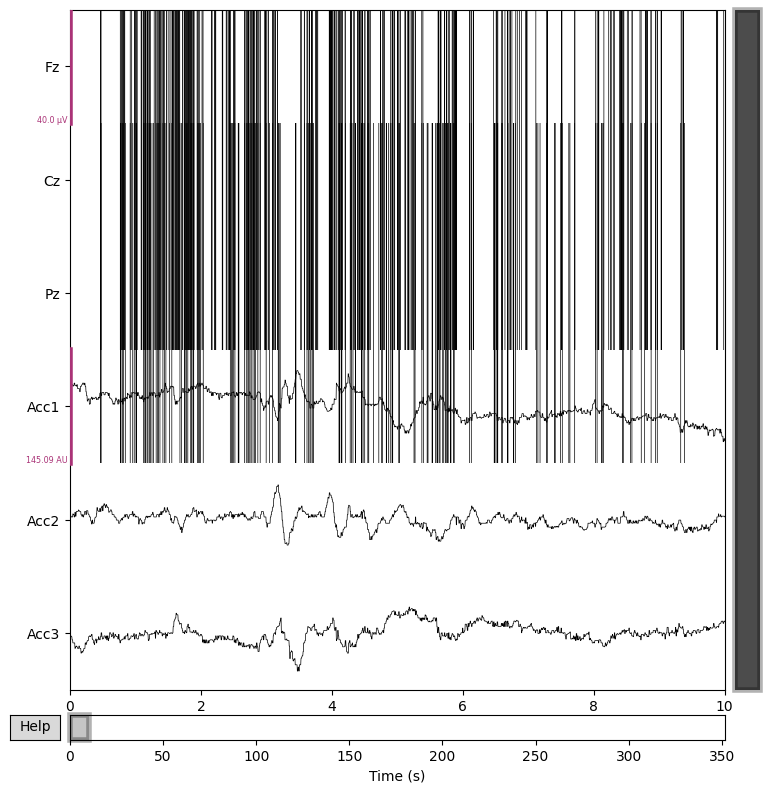

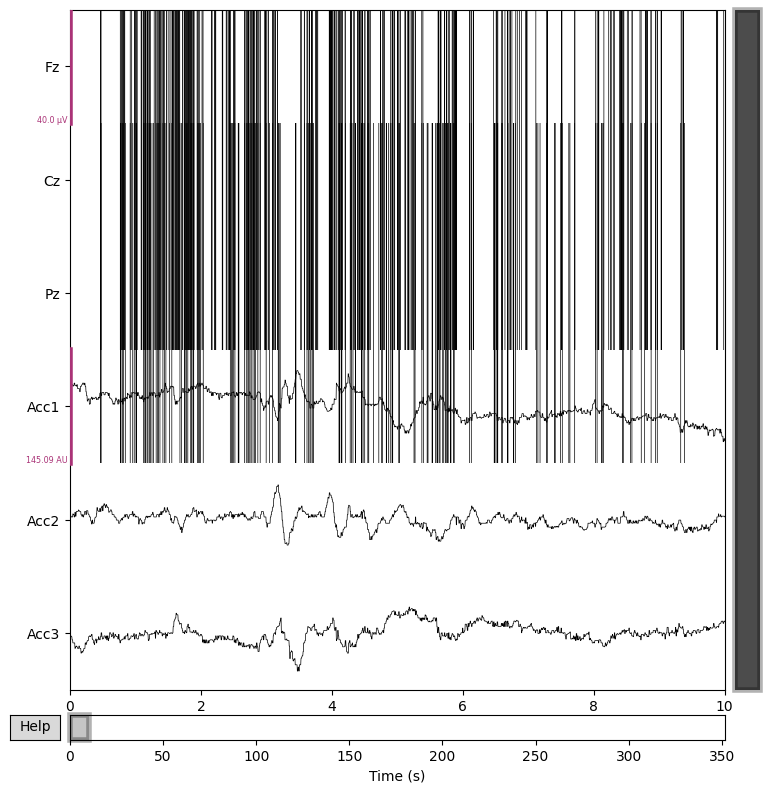

In [11]:
# Path to your .fif file
file_path = f"GammaResults/{participant}/fif/{cond}_training_data.fif"
raw = mne.io.read_raw_fif(file_path, preload=True)
print(raw)
raw.plot()

In [12]:
# # Path to your .fif file
# file_path = f"Results/{participant}/fif/{cond}_test_data.fif"
# raw = mne.io.read_raw_fif(file_path, preload=True)
# print(raw)
# raw.plot()

In [13]:
raw.ch_names

['Fz', 'Cz', 'Pz', 'Acc1', 'Acc2', 'Acc3']

In [14]:
len(raw.ch_names)

6

In [15]:
import pyxdf
import numpy as np
import mne

desired_marker_stream_name = "LSL4Unity.Samples.SimpleCollisionEvent"
eeg_marker_stream_name = "LiveAmpSN-056309-0562"
streams, header = pyxdf.load_xdf('Dataset/P36/sub-P0036_ses-S001_task-Default_run-001_eeg.xdf')

# FIND STREAMS

# List the streams found
for i, s in enumerate(streams):
    # s['info'] is a dict; the name/type/etc. are lists of length 1
    name = s['info']['name'][0] if s['info']['name'] else "N/A"
    stype = s['info']['type'][0] if s['info']['type'] else "N/A"
    sr = s['info']['sample_rate'][0] if s['info']['sample_rate'] else "N/A"
    ch_count = s['info']['channel_count'][0] if s['info']['channel_count'] else "N/A"

    print(f"Stream {i}:")
    print(f"  Name:         {name}")
    print(f"  Type:         {stype}")
    print(f"  Sample Rate:  {sr}")
    print(f"  Channel Count:{ch_count}")
    print("-" * 40)

# Find the marker stream whose name matches exactly
marker_stream = None
for s in streams:
    stream_name = s['info']['name'][0]
    if stream_name == desired_marker_stream_name:
        marker_stream = s
        # break
    if stream_name == eeg_marker_stream_name:
        eeg_stream = s

if marker_stream is None:
    raise ValueError(f"No marker stream found matching name='{desired_marker_stream_name}'")

# FIND EEG START TIME

eeg_data = np.array(eeg_stream['time_series'])  # shape = (n_samples, n_channels)
eeg_timestamps = np.array(eeg_stream['time_stamps'])  # shape = (n_samples,)
print(eeg_stream['info'])

sfreq = float(eeg_stream['info']['nominal_srate'][0])
eeg_start_time = eeg_timestamps[0]
print(f"EEG Marker Start Time: {eeg_start_time}")

# CREATE LSL TABLE

print("Using marker stream:")
# print(marker_stream) # Insanely large

import pandas as pd

# marker_stream is your dictionary for "LSL4Unity.Samples.SimpleCollisionEvent"
all_marker_lists = marker_stream['time_series']  # list of lists, e.g. [['35'], ['45'], ...]
all_timestamps   = marker_stream['time_stamps']  # numpy array of floats

# Flatten each list of strings to just its first element (or an empty string if none)
marker_labels = []
for row in all_marker_lists:
    if len(row) > 0:
        marker_labels.append(row[0])  # e.g. '35'
    else:
        marker_labels.append('')      # in case it's an empty list

# Optionally compute a "relative" timestamp so you can see how many seconds from the first event
first_time = np.min(all_timestamps)    # all_timestamps[0]
relative_times = all_timestamps - first_time

df = pd.DataFrame({
    'EventIndex': range(len(all_timestamps)),
    'Marker': marker_labels,
    'TimestampLSL': all_timestamps,
    'TimestampOffset': relative_times
})

pd.set_option('display.float_format', '{:.8f}'.format)
print(df)

# Save the DataFrame to a CSV file
output_csv = "Dataset/P36/my_marker_data_original.csv"
df.to_csv(output_csv, index=False)
print(f"DataFrame saved to '{output_csv}'.")


Exception: file Dataset\P36\sub-P0036_ses-S001_task-Default_run-001_eeg.xdf does not exist.

In [ ]:
eeg_stream

{'info': defaultdict(list,
             {'name': ['LiveAmpSN-056309-0562'],
              'type': ['EEG'],
              'channel_count': ['11'],
              'channel_format': ['float32'],
              'source_id': ['LiveAmpSN-056309-0562'],
              'nominal_srate': ['500.0000000000000'],
              'version': ['1.100000000000000'],
              'created_at': ['3150.175144200000'],
              'uid': ['2be3ca79-dddd-4e4b-9675-8e8adc660b85'],
              'session_id': ['default'],
              'hostname': ['DESKTOP-S5PB8S1'],
              'v4address': [None],
              'v4data_port': ['16572'],
              'v4service_port': ['16572'],
              'v6address': [None],
              'v6data_port': ['16572'],
              'v6service_port': ['16572'],
              'desc': [defaultdict(list,
                           {'channels': [defaultdict(list,
                                         {'channel': [defaultdict(list,
                                           